# 客户端把所有对话存入数据库

In [92]:
config = {
    'host': '127.0.0.1',
    'user': 'root',
    'password': 'xuhengda',
    'database': 'TEST',
}

db = Database(config)

raw_file = 'chat-short-20w.txt'

# 读取原始数据文件
with open(raw_file, encoding='utf-8') as f:
    data = f.read().strip().split('\n\n')  # '\n\n'分隔每段对话

# 将每段对话合并为一行
corpus = []
for conv_raw in data:
    conv = conv_raw.strip().split('\n')  # '\n'分隔每句话
    conv = list(map(lambda x: x.strip()[2:], conv))  # 去除开头的0/1标记
    corpus.append(' '.join(conv))  
    
print('合并完成 (共%d段对话).' % len(corpus))

for i, conv in enumerate(corpus):
    corpus[i] = [i, conv]
    
db.insert_convs('0', corpus)
    
db.__del__()

合并完成 (共10942段对话).


# 客户端发送请求

In [168]:
import urllib.parse, urllib.request
import json
import time

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from database import Database

url = 'http://localhost:8080'

data = {
    'bot_id': '0',
    'convs': [],
    'stop_words': [],
    'max_df': 0.1,
    'min_df': 20,
    'n_clusters': 50,
    'method': 'kmeans'
}

data = json.dumps(data).encode('utf8')
headers = {'content-type': 'application/json'}
req = urllib.request.Request(url, data=data, headers=headers)

result = urllib.request.urlopen(req).read().decode()
print(result)


config = {
    'host': '127.0.0.1',
    'user': 'root',
    'password': 'xuhengda',
    'database': 'TEST',
}

start = time.time()
while True:
    db = Database(config)
    is_completed, progress = db.query_progress('0')
    if not is_completed:
        print(is_completed, '%.2fs' % (time.time() - start))
        time.sleep(5)
    else:
        print(is_completed, '%.2fs' % (time.time() - start))
        break
    db.__del__()

successfull
False 0.02s
False 5.04s
False 10.06s
False 15.08s
False 20.10s
False 25.13s
False 30.15s
False 35.17s
False 40.19s
False 45.22s
False 50.24s
False 55.26s
False 60.28s
False 65.30s
False 70.32s


KeyboardInterrupt: 

# 分析文件频率TF

In [176]:
db.__del__()

total words: 1000
文件频率df-词数


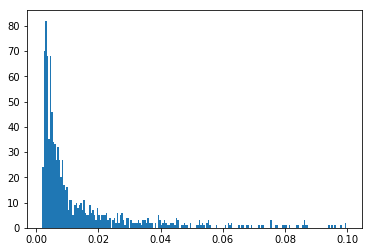

每个词的文件频率df


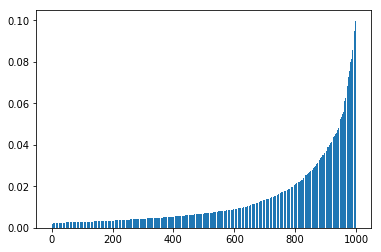

In [164]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 前端读数据库
db = Database(config)
df = db.select_all_dfs('0')
db.__del__()

print('total words:', len(df))
# print(df)

print('文件频率df-词数')
plt.hist(df, 200)
plt.show()

print('每个词的文件频率df')
df.sort()
plt.bar(np.arange(len(df)), df)
plt.show()

# 分析TFIDF值